## For running the notebook as Google Colab Instance

In [ ]:
#mounting the google drive for accessing other necessary files
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# Checking the available files in the "Colab Notebooks" folder of the google drive
!ls /content/gdrive/My\ Drive/Colab\ Notebooks

import sys

#changing the current working directory to "Colab Notebooks" folder in the google drive
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')

## For running the notebook as Kaggle Kernel

change directory to the dataset where our custom scripts are uploaded

> ``os.chdir("/kaggle/input/handwritten-digit-recognition")``

***handwritten-digit-recognition*** is simply a folder name. It can vary based on the dataset you create in kaggle while uploading the python scripts.


load custom module or files or dataset

> ``from  dataset import load_dataset, train_dev_split, prep_dataset`` <br>
> ```from dataset import visualize_data_distribution, visualize_dataset```


reset our working directory

> ```os.chdir("/kaggle/working/")```

**NOTE:** The ***input directory*** is Read-Only. So, we must switch back to the ***working directory*** for performing any other operation that requires write access. Make sure this note book runs as a part of the dataset you create as said above because all the custom modules are uploaded there. 


## Importing Dependencies

In [1]:
# Python Standard Libraries for importing data from binary file
import time    #for calculating time

#core packages
import numpy as np
import matplotlib.pyplot as plt

# os.chdir("/kaggle/input/handwritten-digit-recognition")


#custom module
from  dataset import load_dataset, train_dev_split, prep_dataset
from dataset import visualize_data_distribution, visualize_dataset

from ffnn import init_layers, init_hyperParams
from ffnn import train, evaluate

from ModelUtils import  convert_time
from ModelUtils import save_model, load_model


# # reset our working directory
# os.chdir("/kaggle/working/")


np.random.seed(1)
%matplotlib inline

In [2]:
dataset_size_in_per = 25

train_x_orig, train_y_orig, test_x_orig, test_y_orig = load_dataset(dataset = "mnist", size_in_per = dataset_size_in_per)

print("Sample Size : %d%%\n"%(dataset_size_in_per))
print("Data\t\t\t","Datatype\t\t","Dataset Size")
print("=================================================================")
print("Training Set Images:\t" + str(type(train_x_orig))+"\t",str(train_x_orig.shape))
print("Training Set Labels:\t" + str(type(train_y_orig))+"\t",str(train_y_orig.shape))
print("Test Set Images:\t" + str(type(test_x_orig))+"\t",str(test_x_orig.shape))
print("Test Set Labels:\t" + str(type(test_y_orig))+"\t",str(test_y_orig.shape))
print("=================================================================")

Sample Size : 25%

Data			 Datatype		 Dataset Size
Training Set Images:	<class 'numpy.ndarray'>	 (15000, 28, 28)
Training Set Labels:	<class 'numpy.ndarray'>	 (15000, 1)
Test Set Images:	<class 'numpy.ndarray'>	 (2500, 28, 28)
Test Set Labels:	<class 'numpy.ndarray'>	 (2500, 1)


In [3]:
train_x_split, train_y_split, dev_x_split, dev_y_split = train_dev_split(train_x_orig, train_y_orig)

print("Data\t\t\t\t","Datatype\t\t","Shape")
print("========================================================================")
print("Training Set Images:\t\t" + str(type(train_x_split))+"\t",str(train_x_split.shape))
print("Training Set Labels:\t\t" + str(type(train_y_split))+"\t",str(train_y_split.shape))
print("Development Set Images:\t\t" + str(type(dev_x_split))+"\t",str(dev_x_split.shape))
print("Development Set Labels:\t\t" + str(type(dev_y_split))+"\t",str(dev_y_split.shape))
print("========================================================================")


Data				 Datatype		 Shape
Training Set Images:		<class 'numpy.ndarray'>	 (12750, 28, 28)
Training Set Labels:		<class 'numpy.ndarray'>	 (12750, 1)
Development Set Images:		<class 'numpy.ndarray'>	 (2250, 28, 28)
Development Set Labels:		<class 'numpy.ndarray'>	 (2250, 1)


In [4]:
train_x_norm, train_y_encoded = prep_dataset(train_x_split, train_y_split, num_class = 10)
dev_x_norm, dev_y_encoded= prep_dataset(dev_x_split, dev_y_split, num_class = 10)
test_x_norm, test_y_encoded = prep_dataset(test_x_orig, test_y_orig, num_class = 10)

print("Data\t\t\t","Before Processing\t","After Processing")
print("=================================================================")
print("Training Set Images:\t" + str(train_x_split.shape)+"\t\t"+ str(train_x_norm.shape))
print("Training Set Labels:\t" + str(train_y_split.shape)+"\t\t"+ str(train_y_encoded.shape))
print("Dev Set Images:\t\t" + str(dev_x_split.shape)+"\t\t"+ str(dev_x_norm.shape))
print("Dev Set Labels:\t\t" + str(dev_y_split.shape)+"\t\t"+ str(dev_y_encoded.shape))
print("Test Set Images:\t" + str(test_x_orig.shape)+"\t\t"+ str(test_x_norm.shape))
print("Test Set Labels:\t" + str(test_y_orig.shape)+"\t\t"+ str(test_y_encoded.shape))
print("=================================================================")

Data			 Before Processing	 After Processing
Training Set Images:	(12750, 28, 28)		(784, 12750)
Training Set Labels:	(12750, 1)		(10, 12750)
Dev Set Images:		(2250, 28, 28)		(784, 2250)
Dev Set Labels:		(2250, 1)		(10, 2250)
Test Set Images:	(2500, 28, 28)		(784, 2500)
Test Set Labels:	(2500, 1)		(10, 2500)


## Grid Search

In [12]:
# #creating the hyper parameter grid
# lr = [0.001, 0.01]
# mbz = [64, 128]
# for i in range(len(mbz)):
#     for j in range(len(lr)):
#         plt.scatter(mbz[i],lr[j], color = 'g')
# plt.yscale('log')
# plt.ylim(top = 10e-1, bottom = 10e-6)

# plt.grid(alpha = 0.6)


### Defining the search parameters

In [5]:
architecture = [[1024], [1024, 512], [1024, 1024, 1024], [2048, 512, 256, 1024], [4096, 2048, 1024, 512, 256]]
inits = ["random", "he"]
# optimizers = ["bgd","mgd", "adam"]
# regularizers = ["l2", "dropout"]
# keep_probs = [0.4,0.5,0.6,0.7,0.8]
# hidden_units = [256,512,1024,2048,4096]
# hidden_layers = [2,3,4,5,6]
                
# constants:
#     learning rate: 0.01
#     minibatch size: 64
#     epoch: 10

In [6]:
def grid_search(param1,param2, metric = "acc"):
    
    score = np.zeros((len(param1),len(param2)))
    toc = time.time()
    
    for ind1, i in enumerate(param1):
        print("\nHidden Layers: " + str(i))
        print("==========================================================================================================")
        
        for ind2, j in enumerate(param2):
            print("\nInitialization: " + str(j))
            print("-------------------------------")
            
            layers_dim = init_layers(784, 10, hidden_layers = i)
            
            hyperParams = init_hyperParams(alpha = 0.01, num_epoch = 5, minibatch_size = 64, lambd = 0.7,keep_probs = [0.8,0.8])
            history = train(train_x_norm, train_y_encoded, dev_x_norm, dev_y_encoded,layers_dim, hyperParams, initialization = j, optimizer = 'adam',regularizer = None, verbose = 3)
            
            if metric == "acc": 
                val_acc = history["val_accuracy"][-1]
                score[ind1,ind2] = val_acc
                
            elif metric == "f1-score":
#                 params = history["parameters"]
#                 prediction_dev = predict(dev_x_norm, params, second_guess = False)
#                 cm_dev = confusion_matrix(dev_y_split, prediction_dev)
#                 _, macro_metrics, acc = model_metrics(cm_dev)
#                 f1_score = macro_metrics["F1-Score"]
#                 score[ind1,ind2] = f1_score
                pass
                
            else:
                raise ValueError("Metric must be 'acc' or 'f1-score'")

        print("==========================================================================================================")
        
    tic = time.time() # for calculating entire search time
    hrs, mins, secs , ms = convert_time((tic - toc)*1000)
    
    print("\n\n*************************** Total Training Time = %dhr %dmins %dsecs %.2fms ***************************"%(hrs, mins, secs, ms))
    
    return score

In [7]:
score = grid_search(architecture,inits, metric = "acc")



Hidden Layers: [1024]

Initialization: random
-------------------------------
Training The Model...

Epoch 1/5
200/200 [==================== 100%] - 3.85s 19ms/step | loss: 0.2489 | acc: 0.9264 | val_loss: 0.2327 | val_acc: 0.9298
Epoch 2/5
200/200 [==================== 100%] - 3.93s 19ms/step | loss: 0.0954 | acc: 0.9750 | val_loss: 0.2732 | val_acc: 0.9333
Epoch 3/5
200/200 [==================== 100%] - 3.74s 18ms/step | loss: 0.0625 | acc: 0.9829 | val_loss: 0.1991 | val_acc: 0.9538
Epoch 4/5
200/200 [==================== 100%] - 4.06s 20ms/step | loss: 0.0413 | acc: 0.9889 | val_loss: 0.2188 | val_acc: 0.9484
Epoch 5/5
200/200 [==================== 100%] - 4.35s 21ms/step | loss: 0.0265 | acc: 0.9928 | val_loss: 0.3590 | val_acc: 0.9409

Total Training Time = 0hr 0mins 22secs 568.57ms

Initialization: he
-------------------------------
Training The Model...

Epoch 1/5
200/200 [==================== 100%] - 4.72s 23ms/step | loss: 0.2582 | acc: 0.9267 | val_loss: 0.2245 | val_acc: 0

Training The Model...

Epoch 1/5


/home/befrenz/Sameer Kattel/Education/Course/CSIT/7th Semester/Project Work/HandWritten-Digit-Recognition-using-Deep-Learning/10. Extended/ModelUtils.py:121: RuntimeWarning: invalid value encountered in true_divide
  A = np.divide(t, np.sum(t, axis=0))


200/200 [==================== 100%] - 69.01s 345ms/step | loss: nan | acc: 0.0970 | val_loss: nan | val_acc: 0.1040
Epoch 2/5
200/200 [==================== 100%] - 72.10s 360ms/step | loss: nan | acc: 0.0976 | val_loss: nan | val_acc: 0.1040
Epoch 3/5
200/200 [==================== 100%] - 77.16s 385ms/step | loss: nan | acc: 0.0970 | val_loss: nan | val_acc: 0.1040
Epoch 4/5
200/200 [==================== 100%] - 73.37s 366ms/step | loss: nan | acc: 0.0973 | val_loss: nan | val_acc: 0.1040
Epoch 5/5
200/200 [==================== 100%] - 69.82s 349ms/step | loss: nan | acc: 0.0967 | val_loss: nan | val_acc: 0.1040

Total Training Time = 0hr 6mins 27secs 132.14ms


*************************** Total Training Time = 0hr 21mins 49secs 388.16ms ***************************


In [8]:
print(score)
print(np.where(score == np.max(score)))

[[0.94088889 0.944     ]
 [0.93733333 0.93688889]
 [0.93333333 0.93288889]
 [0.93333333 0.90577778]
 [0.93155556 0.104     ]]
(array([0]), array([1]))


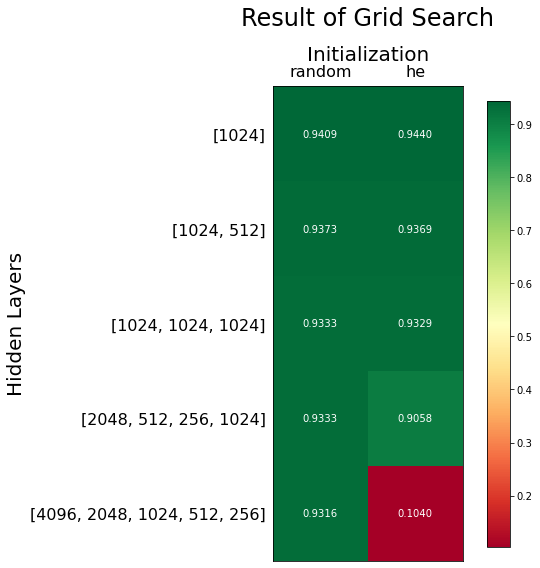

In [37]:
fig, ax = plt.subplots(figsize=(8,8))
im = plt.imshow(score,cmap="RdYlGn") #RdYlGn, PiYG, Accent,Blues,viridis, YlGnBu
fig.colorbar(im,ax=ax,fraction=0.045)

m = len(architecture)
n = len(inits)
    
ax.set_title("Result of Grid Search",fontsize=24,pad = 20)
ax.set_yticks(range(0,m))
ax.set_xticks(range(0,n))
ax.set_ylabel("Hidden Layers", fontsize = 20)
ax.set_xlabel("Initialization", fontsize = 20)

ax.set_yticklabels(architecture,fontsize=16,rotation=0)
ax.set_xticklabels(inits,fontsize=16)

#setting horizontal axes labeling to top.
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')


# Turn off all the ticks
ax.tick_params(top=False,left=False)


thres = [0.88, 0.96]

for i in range(m):
    for j in range(n):
        ax.text(j, i, "%.4f"%(score[i, j]),
                       ha="center", va="center", color="w" if score[i,j] < thres[1] or score[i,j] > thres[0]  else "black")


fig.tight_layout()
plt.show()
